In [1]:
#載入 IMDB 資料集
from tensorflow.keras.datasets import imdb  #從 keras.datasets 套件中匯入 imdb 資料

(train_data, train_labels),(test_data, test_labels)= imdb.load_data(
    num_words=10000)  #從 imdb 中讀取, 只有在訓練集當中最常用的前 10,000 個單字才會被載入, 分別存入 (訓練資料, 訓練標籤) 和 (測試資料, 測試標籤)

In [2]:
train_data[0]  #取第 0 篇評論

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [3]:
train_labels[0]  #第 0 篇評論的評價 : 1=正評；0=負評

1

In [4]:
print(len(train_labels), train_labels)

25000 [1 0 0 ... 0 1 0]


In [5]:
#將整數 list 編碼成二元矩陣
import numpy as np  #匯入 numpy 模組, 後續程式以 np 使用

def vectorize_sequences(sequences, dimension=10000):  #sequences 將傳入 train_data
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):  #用 enumerate 取元素值
        results[i, sequence] = 1.   #將 result[i] 特定索引值的數值設定為 1
    return results
    
x_train = vectorize_sequences(train_data)  #向量化訓練資料
x_test = vectorize_sequences(test_data)  #向量化測試資料

MemoryError: Unable to allocate 1.86 GiB for an array with shape (25000, 10000) and data type float64

In [6]:
len(x_train[0]), x_train[0]

(10000, array([0., 1., 1., ..., 0., 0., 0.]))

In [8]:
y_train = np.asarray(train_labels).astype('float32')  #向量化訓練標籤
y_test = np.asarray(test_labels).astype('float32')  #向量化測試標籤

In [9]:
#建立模型
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()  #使用 models 模組的 Sequential 類別, 建立一個物件讓新增的神經網路層可以進行堆疊
model.add(layers.Dense(16, activation='relu', input_shape=(10000, )))  #輸入層
model.add(layers.Dense(16, activation='relu'))  #隱藏層
model.add(layers.Dense(1, activation='sigmoid'))  #輸出層

In [10]:
#編譯模型
from tensorflow.keras import optimizers

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])  #建立訓練模型

In [11]:
#設定驗證資料集
x_val = x_train[:10000]  #取輸入資料的前 10000 個做驗證 (val)
partial_x_train = x_train[10000:]  #輸入資料的第 10000 個開始才是訓練資料
y_val = y_train[:10000]  #對應的, 要取標籤的前 10000 個做為驗證標籤
partial_y_train = y_train[10000:]  #從標籤的第 10000 個開始才是訓練資料的標籤

In [12]:
#訓練模型
#呼叫 fit() 開始訓練 (使用 partial_x_train 輸入資料、 partial_y_train 標籤、20 個訓練週期、一次訓練週期使用 512 筆資料
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))  #同時傳入驗證集的資料與標籤

Epoch 1/20
30/30 [==============================] - 3s 57ms/step - loss: 0.5127 - acc: 0.7873 - val_loss: 0.3798 - val_acc: 0.8732
Epoch 2/20
30/30 [==============================] - 1s 31ms/step - loss: 0.3014 - acc: 0.9046 - val_loss: 0.3152 - val_acc: 0.8788
Epoch 3/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2216 - acc: 0.9295 - val_loss: 0.2799 - val_acc: 0.8872
Epoch 4/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1747 - acc: 0.9435 - val_loss: 0.2756 - val_acc: 0.8877
Epoch 5/20
30/30 [==============================] - 1s 33ms/step - loss: 0.1421 - acc: 0.9544 - val_loss: 0.3039 - val_acc: 0.8800
Epoch 6/20
30/30 [==============================] - 1s 27ms/step - loss: 0.1180 - acc: 0.9623 - val_loss: 0.2926 - val_acc: 0.8849
Epoch 7/20
30/30 [==============================] - 1s 26ms/step - loss: 0.0933 - acc: 0.9746 - val_loss: 0.3322 - val_acc: 0.8779
Epoch 8/20
30/30 [==============================] - 1s 28ms/step - loss: 0.0805 - a

In [13]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

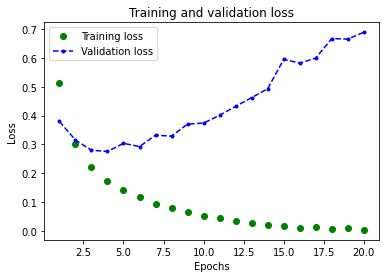

In [14]:
#程式 3.9 繪製訓練與驗證的損失分數
import matplotlib.pyplot as plt  #匯入 matplotlib.pyplot 模組, 後續程式用 plt 使用

history_dict = history.history
loss_values = history_dict['loss']  #取得每次訓練的 loss 訓練損失分數並存成 loss_values 變數
val_loss_values = history_dict['val_loss']  #取得每次驗證的 val_loss 驗證損失分數並指定給 val_loss_values 變數


epochs = range(1, len(loss_values)+ 1)  #len(loss_values) 項目個數為 20,範圍從 1 到 21 (不含 21) 的期間

plt.plot(epochs, loss_values, 'go', label='Training loss')  #以 'b' 指定用藍色線條畫出 x 軸為訓練週期、y 軸為驗證損失分數的圖表, 標籤設為驗證損失分數
plt.plot(epochs, val_loss_values, 'b--.', label='Validation loss')  #以 'bo' 指定用藍色點點畫出 x 軸為訓練週期、y 軸為訓練損失分數的圖表, 標籤設為訓練損失分數
plt.title('Training and validation loss')
plt.xlabel('Epochs')  #將此圖表標題的 x 軸設為訓練週期分數
plt.ylabel('Loss')  #將此圖表標題的 y 軸設為損失
plt.legend()  #可以追加每個輸出圖表的圖像名稱

plt.show()  #顯示圖表

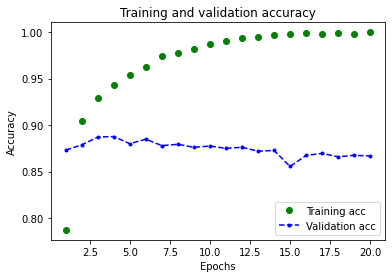

In [15]:
#程式 3.10 繪製訓練和驗證的準確度
plt.clf()  #清除圖表
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'go', label='Training acc')
plt.plot(epochs, val_acc, 'b--.', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()